In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df=pd.read_csv('performance_prediction_dataset.csv')
df

,Training Hours,Player Stats,Game Conditions,Performance
0,10.5,8.2,7.1,78.5
1,8.9,6.5,6.8,66.7
2,12.3,7.9,7.5,80.4
3,9.6,7.0,NaN,72.9
4,11.7,8.3,7.2,79.8
5,10.4,8.1,7.0,NaN
6,9.8,7.3,6.5,73.6
7,10.6,7.7,7.3,76.4
8,9.2,NaN,6.4,70.5
9,11.1,8.2,7.4,78.9


In [16]:
df.isna().sum()

Training Hours     0
Player Stats       1
Game Conditions    1
Performance        1
dtype: int64

In [17]:
# Fill NaN values with the mean of each column
df.fillna(df.mean(), inplace=True)#Handle Missing Values
df.head()

,Training Hours,Player Stats,Game Conditions,Performance
0,10.5,8.2,7.100000,78.5
1,8.9,6.5,6.800000,66.7
2,12.3,7.9,7.500000,80.4
3,9.6,7.0,6.996491,72.9
4,11.7,8.3,7.200000,79.8


In [18]:
df.isna().sum()

Training Hours     0
Player Stats       0
Game Conditions    0
Performance        0
dtype: int64

In [19]:
print(df.shape)
print(df.describe())

(58, 4)
       Training Hours  Player Stats  Game Conditions  Performance
count       58.000000     58.000000        58.000000    58.000000
mean        10.315517      7.692982         6.996491    75.473684
std          0.993099      0.630472         0.362237     4.762335
min          8.500000      6.400000         6.100000    65.200000
25%          9.500000      7.200000         6.725000    71.725000
50%         10.400000      7.700000         7.100000    75.700000
75%         11.075000      8.200000         7.300000    79.125000
max         12.300000      8.800000         7.500000    83.700000


##  Histogram:

	1.	Distribution Overview: Histograms provide a visual summary of the frequency distribution of data points for each feature. Peaks represent values that occur frequently, while flat areas indicate less common values.
	2.	Identifying Skewness: The shape of the histogram can help reveal if the data is skewed (positively or negatively), which is important for understanding the central tendency and potential outliers.


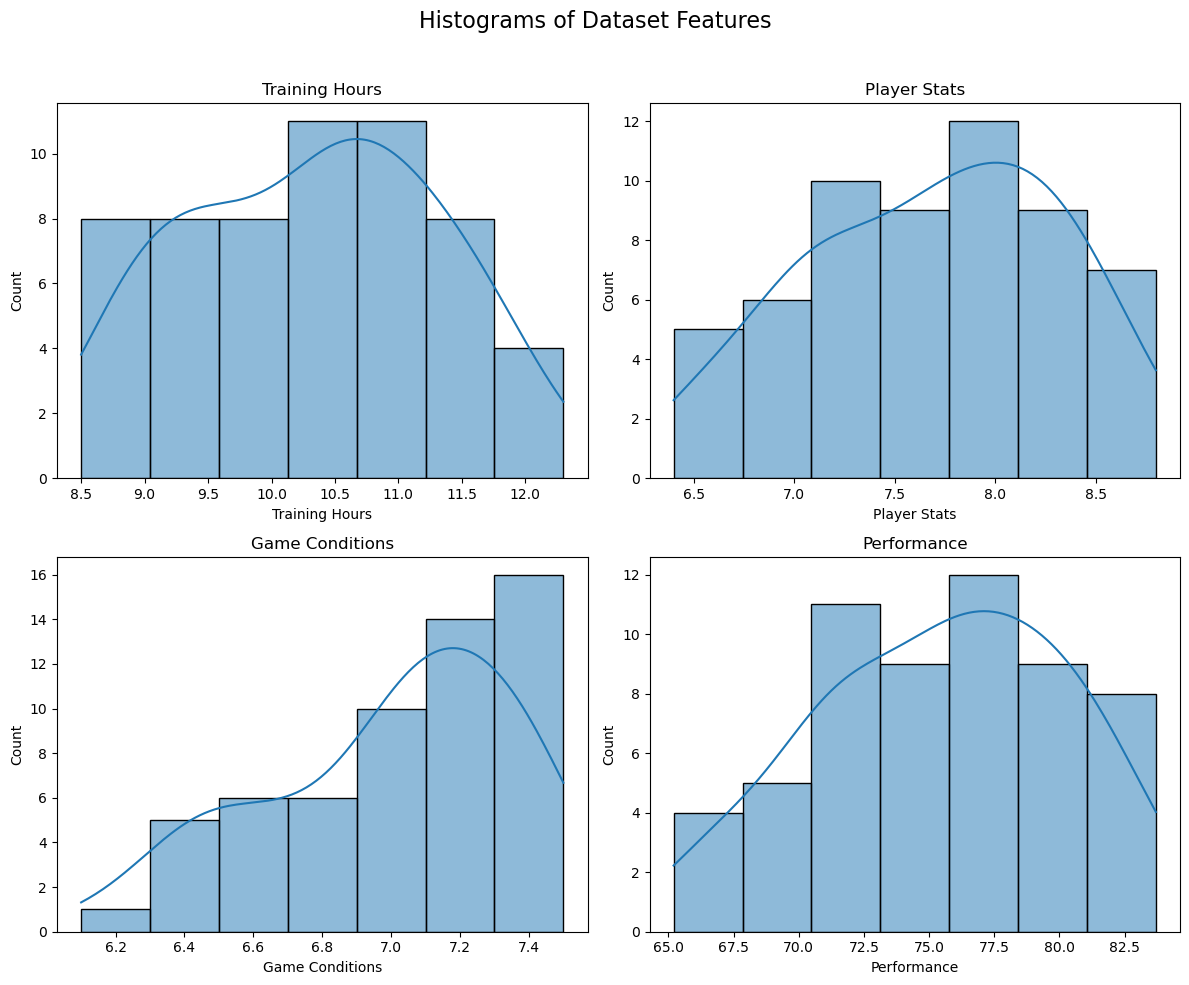

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms of Dataset Features', fontsize=16)

# Histogram for 'Training Hours'
sns.histplot(df['Training Hours'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Training Hours')

# Histogram for 'Player Stats'
sns.histplot(df['Player Stats'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Player Stats')

# Histogram for 'Game Conditions'
sns.histplot(df['Game Conditions'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Game Conditions')

# Histogram for 'Performance'
sns.histplot(df['Performance'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Performance')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

## Boxplot:

	1.	Visualizing Data Spread and Outliers: Boxplots show the distribution of data by dividing it into quartiles. The ‘box’ represents the interquartile range (IQR) where 50% of the values lie, and ‘whiskers’ show the range, making it easy to spot any outliers.
	2.	Median and Spread: The median line within the box provides a quick view of the central tendency, while the box’s width indicates data spread, helping compare variances across different features.


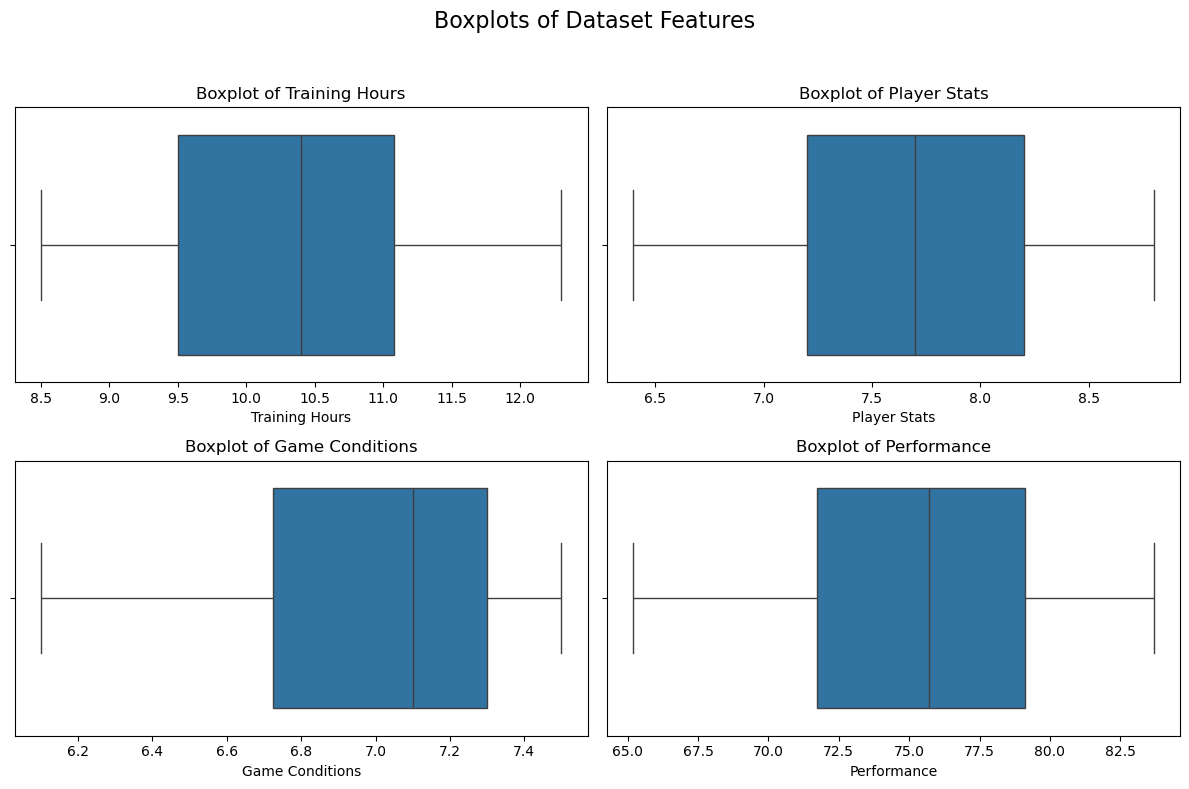

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a 2x2 grid of boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots of Dataset Features', fontsize=16)

# Boxplot for 'Training Hours'
sns.boxplot(x=df['Training Hours'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Training Hours')

# Boxplot for 'Player Stats'
sns.boxplot(x=df['Player Stats'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Player Stats')

# Boxplot for 'Game Conditions'
sns.boxplot(x=df['Game Conditions'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Game Conditions')

# Boxplot for 'Performance'
sns.boxplot(x=df['Performance'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Performance')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

## Density Plot:

	1.	Smooth Distribution Insight: Density plots offer a smoothed visualization of data distribution, providing a continuous curve that reflects where data points are concentrated. It’s especially useful for understanding the overall shape of the data.
	2.	Comparing Feature Distributions: Density plots enable comparison of distributions across features to assess where values are more concentrated or sparse, revealing subtle patterns in the dataset.

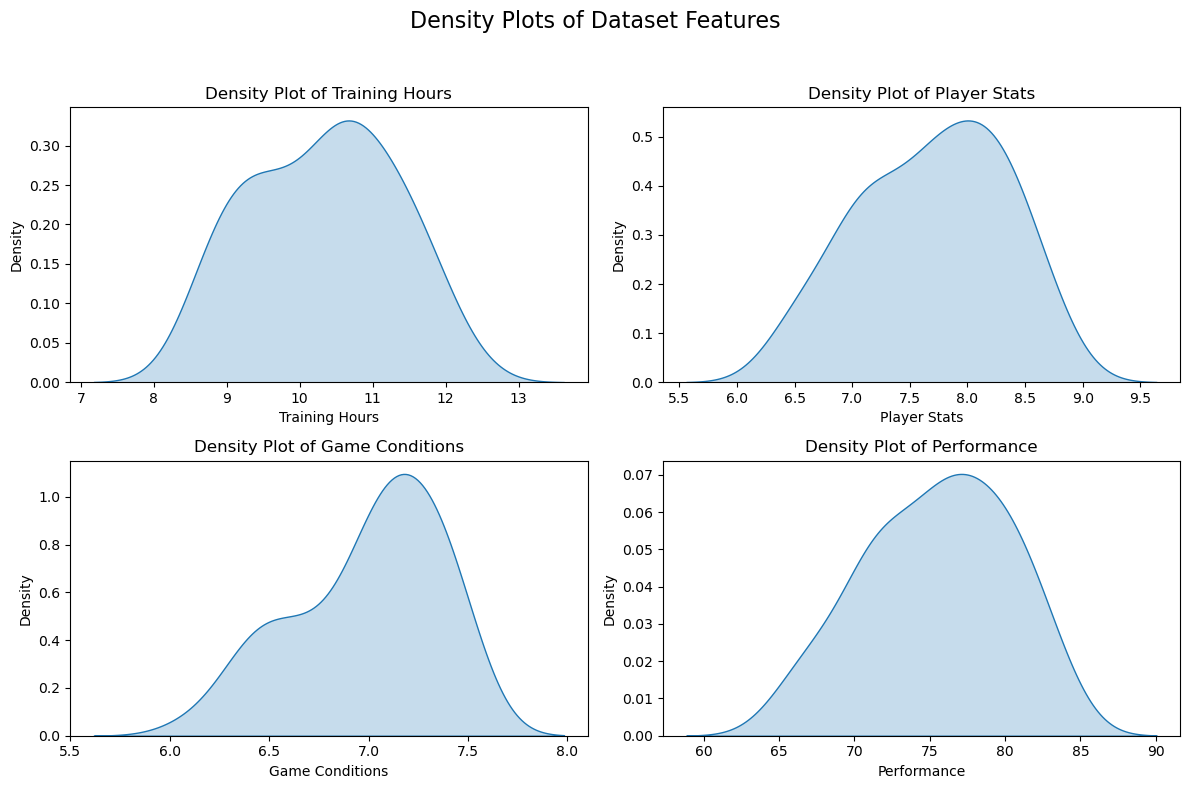

In [22]:
# Set up a 2x2 grid of density plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Density Plots of Dataset Features', fontsize=16)

# Density plot for 'Training Hours'
sns.kdeplot(df['Training Hours'], fill=True, ax=axes[0, 0])
axes[0, 0].set_title('Density Plot of Training Hours')

# Density plot for 'Player Stats'
sns.kdeplot(df['Player Stats'], fill=True, ax=axes[0, 1])
axes[0, 1].set_title('Density Plot of Player Stats')

# Density plot for 'Game Conditions'
sns.kdeplot(df['Game Conditions'], fill=True, ax=axes[1, 0])
axes[1, 0].set_title('Density Plot of Game Conditions')

# Density plot for 'Performance'
sns.kdeplot(df['Performance'], fill=True, ax=axes[1, 1])
axes[1, 1].set_title('Density Plot of Performance')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

## Heatmap

1.	Correlation Visualization: The heatmap uses color gradients to represent correlation values between variables, where darker or lighter shades indicate stronger positive or negative relationships. This allows for quick identification of how strongly features are related to each other or the target variable.
2.	Feature Selection Insights: By showing which features have high correlations, the heatmap helps in selecting relevant variables for the model, potentially improving model performance by focusing on features that contribute most to the target variable.

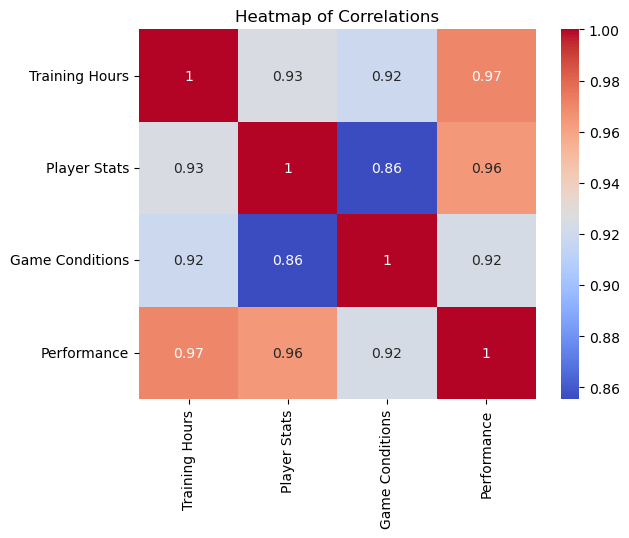

In [23]:
# Heatmap of correlations
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Heatmap of Correlations')
plt.show()

In [24]:
# Separate the 'performance' column as the target variable
target=df['Performance']
# Drop the 'performance' column from df_merged to avoid duplication
df.drop('Performance', axis=1, inplace=True)


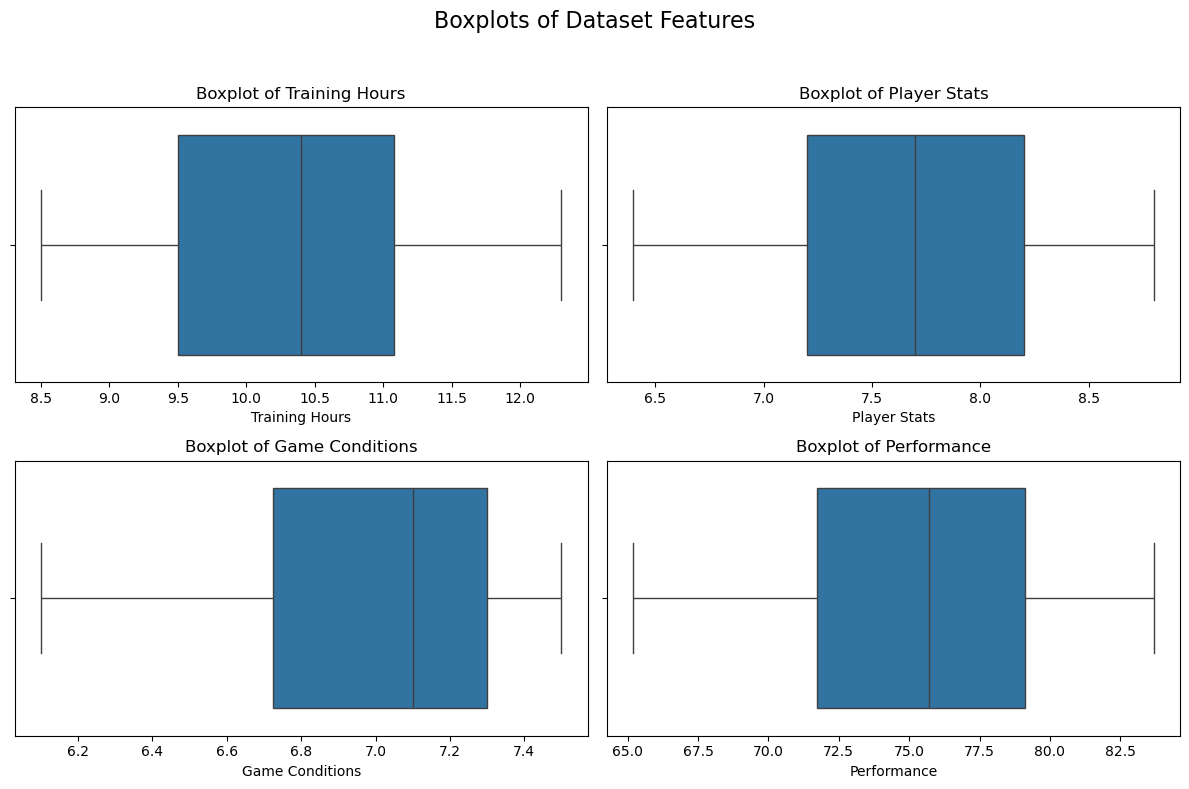

In [25]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv('performance_prediction_dataset.csv')

df.fillna(df.mean(), inplace=True)#Handle Missing Values

# Set up a 2x2 grid of boxplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots of Dataset Features', fontsize=16)

# Boxplot for 'Training Hours'
sns.boxplot(x=df['Training Hours'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of Training Hours')

# Boxplot for 'Player Stats'
sns.boxplot(x=df['Player Stats'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of Player Stats')

# Boxplot for 'Game Conditions'
sns.boxplot(x=df['Game Conditions'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of Game Conditions')

# Boxplot for 'Performance'
sns.boxplot(x=df['Performance'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of Performance')

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

# Separate the 'performance' column as the target variable
target=df['Performance']
# Drop the 'performance' column from df_merged to avoid duplication
df.drop('Performance', axis=1, inplace=True)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

# Importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initializing the Multiple Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(x_train, y_train)

# Predicting the target values (performance) for the test set
y_pred = model.predict(x_test)



In [26]:
df.head()

,Training Hours,Player Stats,Game Conditions
0,10.5,8.2,7.100000
1,8.9,6.5,6.800000
2,12.3,7.9,7.500000
3,9.6,7.0,6.996491
4,11.7,8.3,7.200000


In [27]:
target.head()

0    78.5
1    66.7
2    80.4
3    72.9
4    79.8
Name: Performance, dtype: float64

In [28]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# 'df' contains the input features (independent variables)
# 'target' contains the output labels (dependent variables)
# test_size=0.2 specifies that 20% of the data will be used for testing, and the remaining 80% will be used for training
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [29]:
# Importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [30]:
# Initializing the Multiple Linear Regression model
model = LinearRegression()

In [31]:
# Fitting the model to the training data
model.fit(x_train, y_train)

# Predicting the target values (performance) for the test set
y_pred = model.predict(x_test)
y_pred

array([69.68216451, 82.50431552, 77.23456718, 77.35840097, 80.44050315,
       80.62078205, 80.1327426 , 71.17266671, 79.85380767, 70.5128797 ,
       81.49941102, 72.84953741])

In [32]:
x_test

,Training Hours,Player Stats,Game Conditions
24,9.0,7.0,6.6
56,11.7,8.7,7.5
30,10.5,8.0,7.2
47,10.7,8.0,7.1
4,11.7,8.3,7.2
48,11.4,8.3,7.5
26,11.4,8.3,7.3
51,9.4,7.3,6.5
34,11.2,8.4,7.2
21,9.5,6.9,6.7


In [35]:
# Importing necessary libraries
import numpy as np

# Taking user input for the independent variables
training_hours = float(input("Enter Training Hours: "))
player_stats = float(input("Enter Player Stats: "))
game_conditions = float(input("Enter Game Conditions: "))

# Creating a 2D array for the input data (user's input values)
user_input = np.array([[training_hours, player_stats, game_conditions]])

# Using the trained model to predict the performance
predicted_performance = model.predict(user_input)

# Printing the predicted performance
print(f"Predicted Performance: {predicted_performance[0]}")

Predicted Performance: 77.65642406550452


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
# Evaluating the model
# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared value
r2 = r2_score(y_test, y_pred)

# Printing the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Displaying the coefficients (weights) and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.5290473209933504
R-squared: 0.9745578124724756
Coefficients: [1.83926755 3.32938302 2.44019722]
Intercept: 13.717773796721701
